<a href="https://colab.research.google.com/github/MuhammadShavaiz/AI_learning/blob/main/Logic_Gates_and_Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptrons for Logic Gates and Sentiment Classification**

## **Implementing AND, OR and XOR gates**

In [ ]:
import numpy as np

class SimplePerceptron:
    def __init__(self, activation='linear'):
        self.weights = np.random.randn(2)
        self.bias = np.random.randn(1)
        self.activation = activation

    def activate(self, x):
        if self.activation == 'linear':
            return x
        elif self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activate(z)

    def set_weights(self, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias

class TwoLayerNetwork:
    def __init__(self, input_size=2, hidden_size=4):
        # Initialize with smaller weights
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1) * 0.01
        self.b2 = np.zeros((1, 1))

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def sigmoid_derivative(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)

    def forward(self, X):
        # Ensure X is 2D
        if X.ndim == 1:
            X = X.reshape(1, -1)

        # Hidden layer with ReLU activation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.relu(self.z1)

        # Output layer with sigmoid activation
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        return self.a2

    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        # Binary cross-entropy loss
        epsilon = 1e-15
        return -np.mean(y_true * np.log(y_pred + epsilon) +
                       (1 - y_true) * np.log(1 - y_pred + epsilon))

    def backward(self, X, y):
        if X.ndim == 1:
            X = X.reshape(1, -1)
        if y.ndim == 1:
            y = y.reshape(-1, 1)

        m = X.shape[0]

        # Output layer gradients
        dz2 = self.a2 - y
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)

        # Hidden layer gradients
        dz1 = np.dot(dz2, self.W2.T) * self.relu_derivative(self.z1)
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)

        return dW1, db1, dW2, db2

    def train(self, X, y, epochs=5000, learning_rate=0.05, verbose=True):
        if y.ndim == 1:
            y = y.reshape(-1, 1)

        losses = []

        for epoch in range(epochs):
            # Forward pass
            self.forward(X)

            # Compute loss
            loss = self.compute_loss(y, self.a2)

            # Backward pass
            dW1, db1, dW2, db2 = self.backward(X, y)

            # Update weights and biases
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2

            # Store loss every 1000 epochs
            if epoch % 1000 == 0 and verbose:
                losses.append(loss)
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

                # Print current predictions
                preds = self.forward(X)
                binary_preds = (preds > 0.5).astype(int)
                print("Current predictions:")
                for i in range(len(X)):
                    print(f"Input: [{X[i][0]}, {X[i][1]}], True: {y[i][0]}, Predicted: {binary_preds[i][0]}")
                print()

        return losses

# Test data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1])
y_xor = np.array([0, 1, 1, 0])

# AND and OR Gates
and_gate_linear = SimplePerceptron(activation='linear')
and_gate_linear.set_weights([1, 1], -1.5)

and_gate_sigmoid = SimplePerceptron(activation='sigmoid')
and_gate_sigmoid.set_weights([2, 2], -3)

or_gate_linear = SimplePerceptron(activation='linear')
or_gate_linear.set_weights([1, 1], -0.5)

or_gate_sigmoid = SimplePerceptron(activation='sigmoid')
or_gate_sigmoid.set_weights([2, 2], -1)

# XOR Gate with proper initialization and training
print("Training XOR Gate...")
xor_gate = TwoLayerNetwork(input_size=2, hidden_size=4)
losses = xor_gate.train(X, y_xor, epochs=5000, learning_rate=0.1)

def test_gates():
    print("\nFinal Results:")

    print("\nAND Gate Results:")
    print("Input\t\tLinear\tSigmoid")
    for i in range(len(X)):
        x = X[i]
        linear_pred = 1 if and_gate_linear.predict(x) > 0 else 0
        sigmoid_pred = 1 if and_gate_sigmoid.predict(x) > 0.5 else 0
        print(f"[{x[0]}, {x[1]}]\t{linear_pred}\t{sigmoid_pred}")

    print("\nOR Gate Results:")
    print("Input\t\tLinear\tSigmoid")
    for i in range(len(X)):
        x = X[i]
        linear_pred = 1 if or_gate_linear.predict(x) > 0 else 0
        sigmoid_pred = 1 if or_gate_sigmoid.predict(x) > 0.5 else 0
        print(f"[{x[0]}, {x[1]}]\t{linear_pred}\t{sigmoid_pred}")

    print("\nXOR Gate Results (Two-Layer Network with ReLU hidden, Sigmoid output):")
    print("Input\t\tPrediction\tExpected")
    for i in range(len(X)):
        x = X[i]
        pred = xor_gate.forward(x)
        binary_pred = 1 if pred > 0.5 else 0
        print(f"[{x[0]}, {x[1]}]\t{binary_pred} ({float(pred):.3f})\t{y_xor[i]}")

# Run the tests
test_gates()

Training XOR Gate...
Epoch 0, Loss: 0.6931
Current predictions:
Input: [0, 0], True: 0, Predicted: 1
Input: [0, 1], True: 1, Predicted: 1
Input: [1, 0], True: 1, Predicted: 0
Input: [1, 1], True: 0, Predicted: 0

Epoch 1000, Loss: 0.2942
Current predictions:
Input: [0, 0], True: 0, Predicted: 0
Input: [0, 1], True: 1, Predicted: 1
Input: [1, 0], True: 1, Predicted: 1
Input: [1, 1], True: 0, Predicted: 0

Epoch 2000, Loss: 0.0213
Current predictions:
Input: [0, 0], True: 0, Predicted: 0
Input: [0, 1], True: 1, Predicted: 1
Input: [1, 0], True: 1, Predicted: 1
Input: [1, 1], True: 0, Predicted: 0

Epoch 3000, Loss: 0.0094
Current predictions:
Input: [0, 0], True: 0, Predicted: 0
Input: [0, 1], True: 1, Predicted: 1
Input: [1, 0], True: 1, Predicted: 1
Input: [1, 1], True: 0, Predicted: 0

Epoch 4000, Loss: 0.0059
Current predictions:
Input: [0, 0], True: 0, Predicted: 0
Input: [0, 1], True: 1, Predicted: 1
Input: [1, 0], True: 1, Predicted: 1
Input: [1, 1], True: 0, Predicted: 0


Final 

<ipython-input-17-6880c6a6bf11>:172: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"[{x[0]}, {x[1]}]\t{binary_pred} ({float(pred):.3f})\t{y_xor[i]}")


## **Experiment with Different Activation Functions for Logic Gates**


In [ ]:
import matplotlib.pyplot as plt
from typing import Callable
import time

class ActivationFunctionTest:
    def __init__(self, hidden_size: int = 4):
        self.hidden_size = hidden_size
        self.activation_functions = {
            'sigmoid': (
                lambda x: 1 / (1 + np.exp(-x)),
                lambda x: x * (1 - x)
            ),
            'tanh': (
                lambda x: np.tanh(x),
                lambda x: 1 - np.tanh(x)**2
            ),
            'relu': (
                lambda x: np.maximum(0, x),
                lambda x: np.where(x > 0, 1, 0)
            )
        }

    def initialize_weights(self, input_size: int, hidden_size: int) -> tuple:
        """Initialize weights for the network."""
        hidden_weights = np.random.randn(input_size, hidden_size) * 0.1
        hidden_bias = np.random.randn(hidden_size) * 0.1
        output_weights = np.random.randn(hidden_size) * 0.1
        output_bias = np.random.randn() * 0.1
        return hidden_weights, hidden_bias, output_weights, output_bias

    def forward_pass(self, x: np.ndarray, weights: tuple,
                    hidden_activation: Callable, output_activation: Callable) -> tuple:
        """Perform forward pass through the network."""
        hidden_weights, hidden_bias, output_weights, output_bias = weights
        hidden = hidden_activation(np.dot(x, hidden_weights) + hidden_bias)
        output = output_activation(np.dot(hidden, output_weights) + output_bias)
        return output, hidden

    def train_network(self, X: np.ndarray, y: np.ndarray,
                     hidden_activation_name: str, output_activation_name: str,
                     learning_rate: float = 0.1, epochs: int = 10000) -> tuple:
        """Train the network with specified activation functions."""
        hidden_activation, hidden_derivative = self.activation_functions[hidden_activation_name]
        output_activation, output_derivative = self.activation_functions[output_activation_name]

        # Initialize weights
        weights = self.initialize_weights(X.shape[1], self.hidden_size)
        hidden_weights, hidden_bias, output_weights, output_bias = weights

        losses = []
        accuracies = []

        start_time = time.time()

        for epoch in range(epochs):
            total_loss = 0
            correct_predictions = 0

            for i in range(len(X)):
                # Forward pass
                output, hidden = self.forward_pass(X[i], weights, hidden_activation, output_activation)

                # Calculate loss
                error = y[i] - output
                total_loss += error ** 2

                # Check prediction
                prediction = 1 if output >= 0.5 else 0
                if prediction == y[i]:
                    correct_predictions += 1

                # Backpropagation
                output_delta = error * output_derivative(output)
                hidden_delta = np.outer(X[i],
                    (output_weights * output_delta) * hidden_derivative(hidden))

                # Update weights and biases
                output_weights += learning_rate * output_delta * hidden
                output_bias += learning_rate * output_delta
                hidden_weights += learning_rate * hidden_delta
                hidden_bias += learning_rate * (output_weights * output_delta) * hidden_derivative(hidden)

            # Store metrics
            losses.append(total_loss / len(X))
            accuracies.append(correct_predictions / len(X))

        training_time = time.time() - start_time

        return losses, accuracies, training_time, weights

Testing AND Gate...


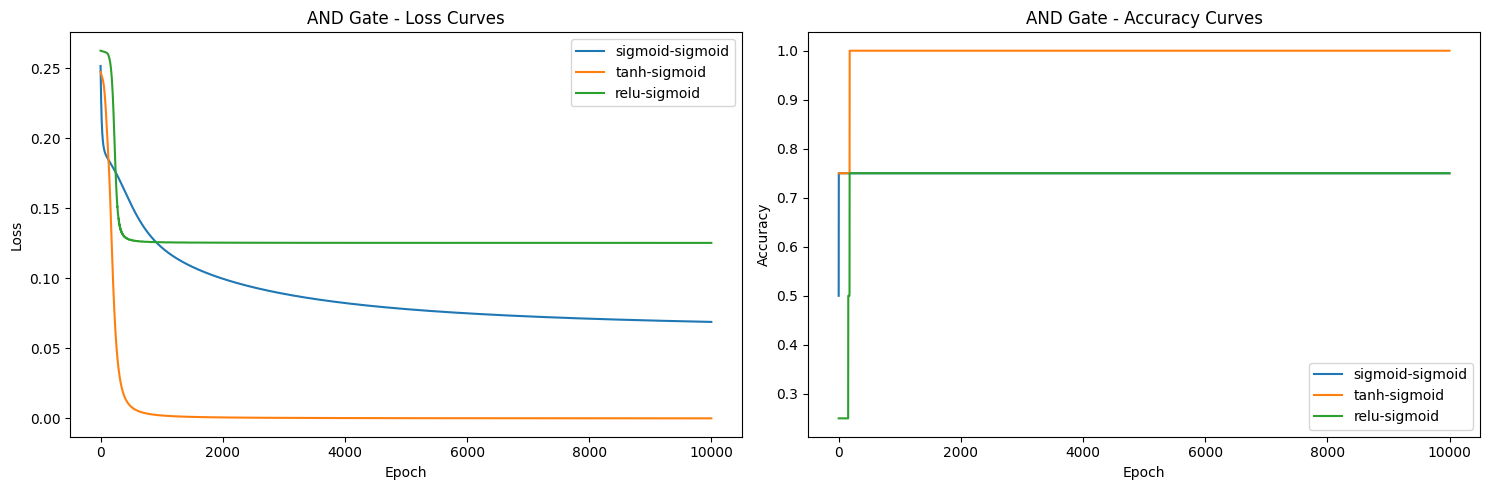


Results for AND Gate:

Activation Functions: sigmoid-sigmoid
Final Accuracy: 75.00%
Training Time: 1.594 seconds

Predictions:
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 0, Actual: 0
Input: [1 0], Predicted: 0, Actual: 0
Input: [1 1], Predicted: 0, Actual: 1

Activation Functions: tanh-sigmoid
Final Accuracy: 100.00%
Training Time: 1.397 seconds

Predictions:
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 0, Actual: 0
Input: [1 0], Predicted: 0, Actual: 0
Input: [1 1], Predicted: 1, Actual: 1

Activation Functions: relu-sigmoid
Final Accuracy: 75.00%
Training Time: 1.492 seconds

Predictions:
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 0, Actual: 0
Input: [1 0], Predicted: 1, Actual: 0
Input: [1 1], Predicted: 1, Actual: 1

Testing XOR Gate...


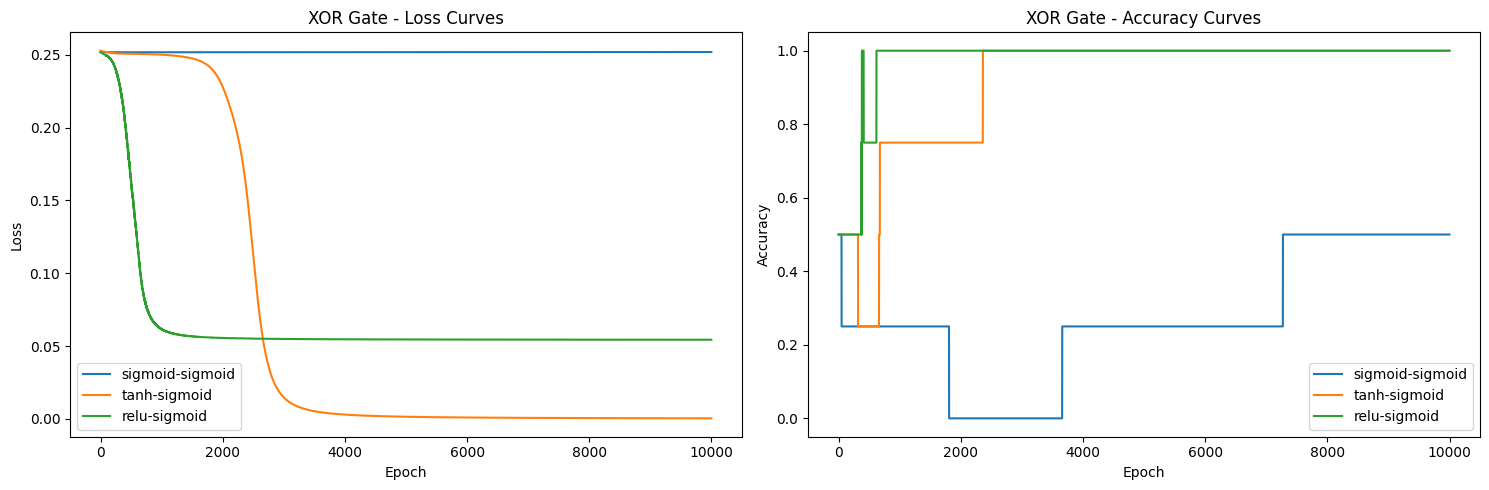


Results for XOR Gate:

Activation Functions: sigmoid-sigmoid
Final Accuracy: 50.00%
Training Time: 2.176 seconds

Predictions:
Input: [0 0], Predicted: 1, Actual: 0
Input: [0 1], Predicted: 0, Actual: 1
Input: [1 0], Predicted: 1, Actual: 1
Input: [1 1], Predicted: 0, Actual: 0

Activation Functions: tanh-sigmoid
Final Accuracy: 100.00%
Training Time: 1.659 seconds

Predictions:
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 1, Actual: 1
Input: [1 0], Predicted: 1, Actual: 1
Input: [1 1], Predicted: 0, Actual: 0

Activation Functions: relu-sigmoid
Final Accuracy: 100.00%
Training Time: 1.493 seconds

Predictions:
Input: [0 0], Predicted: 0, Actual: 0
Input: [0 1], Predicted: 1, Actual: 1
Input: [1 0], Predicted: 1, Actual: 1
Input: [1 1], Predicted: 0, Actual: 0


In [ ]:
def test_gate(gate_type: str):
    """Test different activation function combinations for a specific gate."""
    # Prepare data
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    if gate_type == 'AND':
        y = np.array([0, 0, 0, 1])
    else:  # XOR
        y = np.array([0, 1, 1, 0])

    # Initialize tester
    tester = ActivationFunctionTest()
    activation_combinations = [
        ('sigmoid', 'sigmoid'),
        ('tanh', 'sigmoid'),
        ('relu', 'sigmoid'),
    ]

    results = {}

    # Test each combination
    for hidden_act, output_act in activation_combinations:
        name = f"{hidden_act}-{output_act}"
        losses, accuracies, training_time, weights = tester.train_network(
            X, y, hidden_act, output_act)
        results[name] = {
            'losses': losses,
            'accuracies': accuracies,
            'training_time': training_time,
            'weights': weights
        }

    # Plotting
    plt.figure(figsize=(15, 5))

    # Plot losses
    plt.subplot(1, 2, 1)
    for name, data in results.items():
        plt.plot(data['losses'], label=name)
    plt.title(f'{gate_type} Gate - Loss Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracies
    plt.subplot(1, 2, 2)
    for name, data in results.items():
        plt.plot(data['accuracies'], label=name)
    plt.title(f'{gate_type} Gate - Accuracy Curves')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Print results
    print(f"\nResults for {gate_type} Gate:")
    print("=" * 50)
    for name, data in results.items():
        final_accuracy = data['accuracies'][-1] * 100
        print(f"\nActivation Functions: {name}")
        print(f"Final Accuracy: {final_accuracy:.2f}%")
        print(f"Training Time: {data['training_time']:.3f} seconds")

        # Test predictions
        tester = ActivationFunctionTest()
        hidden_act, output_act = name.split('-')
        hidden_activation = tester.activation_functions[hidden_act][0]
        output_activation = tester.activation_functions[output_act][0]

        print("\nPredictions:")
        for x_i, y_i in zip(X, y):
            output, _ = tester.forward_pass(x_i, data['weights'],
                                          hidden_activation, output_activation)
            pred = 1 if output >= 0.5 else 0
            print(f"Input: {x_i}, Predicted: {pred}, Actual: {y_i}")

# Test both gates
print("Testing AND Gate...")
test_gate('AND')
print("\nTesting XOR Gate...")
test_gate('XOR')

## **Build a Simple Neural Network for Sentiment Classification**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class SentimentAnalysisNN:
    def __init__(self, input_dim, hidden_units=64):
        # Initializing weights and biases for the network
        self.weights_hidden = np.random.randn(input_dim, hidden_units) * 0.01
        self.bias_hidden = np.zeros((1, hidden_units))
        self.weights_output = np.random.randn(hidden_units, 1) * 0.01
        self.bias_output = np.zeros((1, 1))

    def relu_activation(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    def sigmoid_activation(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def sigmoid_derivative(self, x):
        s = self.sigmoid_activation(x)
        return s * (1 - s)

    def forward_pass(self, X):
        # Compute hidden layer
        self.hidden_layer_input = np.dot(X, self.weights_hidden) + self.bias_hidden
        self.hidden_layer_output = self.relu_activation(self.hidden_layer_input)

        # Compute output layer
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_output) + self.bias_output
        self.predictions = self.sigmoid_activation(self.output_layer_input)

        return self.predictions

    def backward_pass(self, X, y, learning_rate):
        m = X.shape[0]

        # Compute gradients for output layer
        output_error = self.predictions - y.reshape(-1, 1)
        grad_weights_output = (1/m) * np.dot(self.hidden_layer_output.T, output_error)
        grad_bias_output = (1/m) * np.sum(output_error, axis=0, keepdims=True)

        # Compute gradients for hidden layer
        hidden_error = np.dot(output_error, self.weights_output.T) * self.relu_derivative(self.hidden_layer_input)
        grad_weights_hidden = (1/m) * np.dot(X.T, hidden_error)
        grad_bias_hidden = (1/m) * np.sum(hidden_error, axis=0, keepdims=True)

        # Update the parameters using gradients
        self.weights_output -= learning_rate * grad_weights_output
        self.bias_output -= learning_rate * grad_bias_output
        self.weights_hidden -= learning_rate * grad_weights_hidden
        self.bias_hidden -= learning_rate * grad_bias_hidden

    def train(self, X, y, learning_rate=0.01, epochs=1000):
        loss_history = []
        accuracy_history = []

        for epoch in range(epochs):
            # Perform forward pass
            output = self.forward_pass(X)

            # Compute loss using binary cross-entropy
            loss = -np.mean(y * np.log(output + 1e-15) + (1 - y) * np.log(1 - output + 1e-15))
            loss_history.append(loss)

            # Compute accuracy
            predicted_labels = (output >= 0.5).astype(int)
            accuracy = np.mean(predicted_labels == y.reshape(-1, 1))
            accuracy_history.append(accuracy)

            # Perform backward pass
            self.backward_pass(X, y, learning_rate)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

        return loss_history, accuracy_history

In [ ]:
# Define new positive and negative reviews
positive_reviews = [
    "This product is fantastic!", "I absolutely love this", "Such an amazing experience",
    "Highly recommend this item", "Incredible quality and value", "Totally worth the money",
    "This was the best decision ever", "I’m so happy with this", "Exceeded my expectations",
    "Top-notch service and results", "I’m impressed with this product", "Unbeatable quality",
    "Wonderful experience from start to finish", "Very happy with my purchase", "Exceptional product",
    "Perfect for my needs", "Would definitely buy again", "Great value for money", "Absolutely brilliant",
    "Couldn't be happier with this purchase", "Fantastic quality"
]

negative_reviews = [
    "This is terrible", "Very disappointing", "Not worth the money", "Regret buying this",
    "Worst product ever", "Extremely dissatisfied", "Would not recommend to anyone", "Very frustrating",
    "Complete waste of money", "Horrible service", "Totally regret this purchase", "Poor quality product",
    "Very unhappy with this", "This is a scam", "I’ve had better experiences", "Awful product",
    "The worst purchase I've ever made", "Extremely disappointing", "Total waste of time",
    "Never buying from here again", "Very bad quality"
]

# Prepare the dataset
reviews = positive_reviews + negative_reviews
labels = np.array([1] * len(positive_reviews) + [0] * len(negative_reviews))

Testing Bag of Words Vectorizer...
Epoch 0, Loss: 0.6931, Accuracy: 0.5152
Epoch 100, Loss: 0.6929, Accuracy: 0.5152
Epoch 200, Loss: 0.6928, Accuracy: 0.5152
Epoch 300, Loss: 0.6933, Accuracy: 0.6970
Epoch 400, Loss: 0.6960, Accuracy: 0.9697
Epoch 500, Loss: 0.7071, Accuracy: 1.0000
Epoch 600, Loss: 0.7392, Accuracy: 1.0000
Epoch 700, Loss: 0.8048, Accuracy: 1.0000
Epoch 800, Loss: 0.9072, Accuracy: 1.0000
Epoch 900, Loss: 1.0361, Accuracy: 1.0000


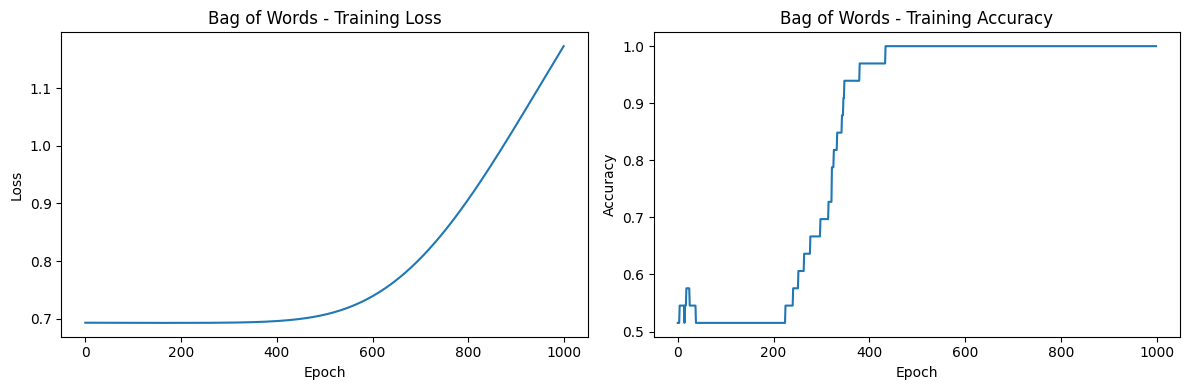


Results for Bag of Words:
Test Accuracy: 0.6667

Sample Predictions:
Review: 'Absolutely love it, amazing quality!'
Prediction: Positive (confidence: 0.9598)

Review: 'I hate this product, it's terrible'
Prediction: Negative (confidence: 0.6934)

Review: 'Such a great experience, will buy again'
Prediction: Positive (confidence: 0.9578)

Review: 'Very disappointed, waste of money'
Prediction: Negative (confidence: 0.6079)


Testing TF-IDF Vectorizer...
Epoch 0, Loss: 0.6931, Accuracy: 0.5758
Epoch 100, Loss: 0.6929, Accuracy: 0.5152


<ipython-input-27-c1b63300de74>:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Prediction: {sentiment} (confidence: {float(confidence):.4f})\n")


Epoch 200, Loss: 0.6929, Accuracy: 0.5455
Epoch 300, Loss: 0.6932, Accuracy: 0.8182
Epoch 400, Loss: 0.6953, Accuracy: 0.9697
Epoch 500, Loss: 0.7044, Accuracy: 1.0000
Epoch 600, Loss: 0.7332, Accuracy: 1.0000
Epoch 700, Loss: 0.7991, Accuracy: 1.0000
Epoch 800, Loss: 0.9084, Accuracy: 1.0000
Epoch 900, Loss: 1.0458, Accuracy: 1.0000


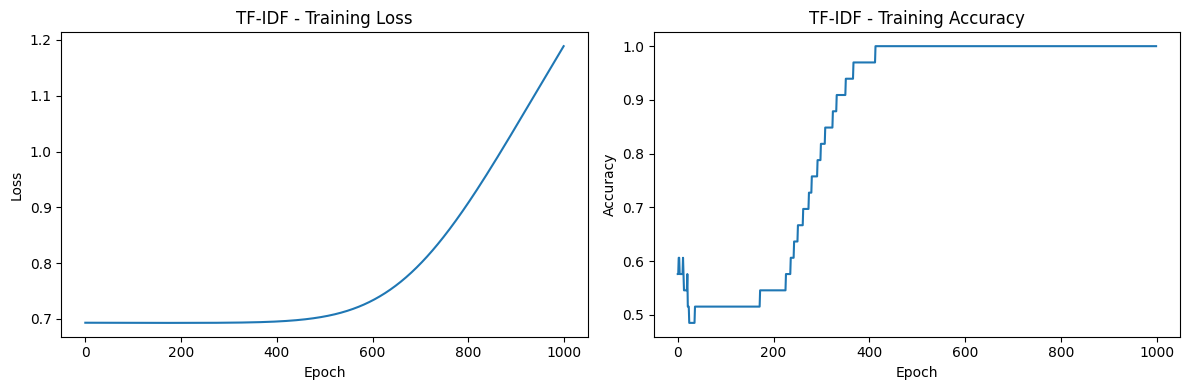


Results for TF-IDF:
Test Accuracy: 0.4444

Sample Predictions:
Review: 'Absolutely love it, amazing quality!'
Prediction: Positive (confidence: 0.9117)

Review: 'I hate this product, it's terrible'
Prediction: Negative (confidence: 0.7651)

Review: 'Such a great experience, will buy again'
Prediction: Positive (confidence: 0.9498)

Review: 'Very disappointed, waste of money'
Prediction: Negative (confidence: 0.5686)



<ipython-input-27-c1b63300de74>:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Prediction: {sentiment} (confidence: {float(confidence):.4f})\n")


In [ ]:
def evaluate_vectorizer(vectorizer_name, vectorizer, reviews, labels):
    # Vectorize text
    X = vectorizer.fit_transform(reviews).toarray()

    # Normalize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

    # Initialize the model and train it
    model = SentimentAnalysisNN(input_dim=X.shape[1])
    loss_history, accuracy_history = model.train(X_train, y_train, epochs=1000)

    # Evaluate the model on the test set
    test_predictions = model.forward_pass(X_test)
    test_accuracy = np.mean((test_predictions >= 0.5).astype(int) == y_test.reshape(-1, 1))

    # Plot training loss and accuracy
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(loss_history)
    plt.title(f'{vectorizer_name} - Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.subplot(1, 2, 2)
    plt.plot(accuracy_history)
    plt.title(f'{vectorizer_name} - Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

    plt.tight_layout()
    plt.show()

    print(f"\nResults for {vectorizer_name}:")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Example predictions for some sample reviews
    print("\nSample Predictions:")
    sample_reviews = [
        "Absolutely love it, amazing quality!",
        "I hate this product, it's terrible",
        "Such a great experience, will buy again",
        "Very disappointed, waste of money"
    ]

    sample_vectors = vectorizer.transform(sample_reviews).toarray()
    sample_vectors = scaler.transform(sample_vectors)
    predictions = model.forward_pass(sample_vectors)

    for review, pred in zip(sample_reviews, predictions):
        sentiment = "Positive" if pred >= 0.5 else "Negative"
        confidence = pred if pred >= 0.5 else 1 - pred
        print(f"Review: '{review}'")
        print(f"Prediction: {sentiment} (confidence: {float(confidence):.4f})\n")

    return model, vectorizer, scaler

# Test both vectorization methods
print("Testing Bag of Words Vectorizer...")
bow_vectorizer = CountVectorizer()
bow_model, bow_vectorizer, bow_scaler = evaluate_vectorizer(
    "Bag of Words", bow_vectorizer, reviews, labels
)

print("\nTesting TF-IDF Vectorizer...")
tfidf_vectorizer = TfidfVectorizer()
tfidf_model, tfidf_vectorizer, tfidf_scaler = evaluate_vectorizer(
    "TF-IDF", tfidf_vectorizer, reviews, labels
)